In [783]:
from sympy import *
import sympy as sp
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sp.init_printing()

### **soal 1 menggunakan metode biseksi dan titik tetap**

$f(x)=x^2-x-1$

#### **METODE BISEKSI**

In [784]:
# fungsi soal
def f(x):
    return x**2 - x - 1

In [785]:
tol = 1.0E-10
delta = 1000
a = 1.0
b = 2.0
fa = f(a)
fb = f(b)
xd = []
xn = b
lis_c = []
lis_delta = []

while delta > tol:
    # nilai tengah
    c = (a+b)/2.0
    fc = f(c)
    lis_c.append(c)

    # cek jika interval mengandung solusi
    if (fa*fc) < 0:
        b = c
        fb = fc
    else:
        a = c
        fa = fc

    xd.append(c)
    xnp1 = c
    delta = abs(xnp1 - xn)
    lis_delta.append(delta)
    xn = xnp1

print(xd)

[1.5, 1.75, 1.625, 1.5625, 1.59375, 1.609375, 1.6171875, 1.62109375, 1.619140625, 1.6181640625, 1.61767578125, 1.617919921875, 1.6180419921875, 1.61798095703125, 1.618011474609375, 1.6180267333984375, 1.6180343627929688, 1.6180305480957031, 1.618032455444336, 1.6180334091186523, 1.6180338859558105, 1.6180341243743896, 1.6180340051651, 1.6180339455604553, 1.6180339753627777, 1.618033990263939, 1.6180339828133583, 1.6180339865386486, 1.6180339884012938, 1.6180339893326163, 1.618033988866955, 1.6180339886341244, 1.6180339887505397, 1.618033988692332]


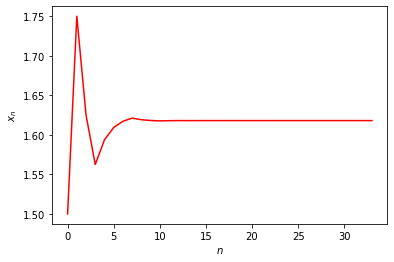

In [791]:
n = np.arange(len(xd))
xd = np.array(xd)
plt.plot(n,xd,'r')
plt.xlabel('$n$')
plt.ylabel('$x_n$')
plt.show()


#### **METODE TITIK TETAP**

##### Langkah 1 : mengubah **f(x) = 0** menjadi persamaan bentuk **g(x)**

**f(x)** = $x^2$ - $x$ - $1$

Terdapat 3 kemungkinan $g(x)$

- a. $g(x)$ = $\sqrt{x+1}$
  
- b. $g(x)$ = $x^2$ - $1$
  
- c. $g(x)$ = $\frac{1}{x - 1}$

##### Langkah 2 : menentukan kekonvergenan seluruh kemungkinan $g(x)$

Setelah diturunkan didapatkan sebagai berikut:

- $g'(x)$ = $\frac{1}{2\sqrt{x+1}}$
  
- $g'(x)$ = $2x$

- $g'(x)$ = $-\frac{1}{(x-1)^2}$

turunan dari kemungkinan g(x) pertama


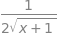

In [792]:
x = Symbol('x')

g = sqrt(x+1)
derivative_g = g.diff(x)
print("turunan dari kemungkinan g(x) pertama")
derivative_g


In [793]:
x = Symbol('x')

g = x**2 - 1
derivative_g = g.diff(x)
print("turunan dari kemungkinan g(x) kedua")
derivative_g

turunan dari kemungkinan g(x) kedua


turunan dari kemungkinan g(x) ketiga


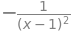

In [794]:
x = Symbol('x')

g = 1 / (x-1)
derivative_g = g.diff(x)
print("turunan dari kemungkinan g(x) ketiga")
derivative_g

##### Langkah 3 : mensubstitusikan nilai $x0$ untuk cek kekonvergenan

In [795]:
def g1(x):
    return 1 / 2 * math.pow((x+1), -1/2)

def g2(x):
    return 2*x

def g3(x):
    return -1 / math.pow((x-1), 2)

In [796]:
print("hasil dari g1 dengan x0 = 2")
g1(2)

hasil dari g1 dengan x0 = 2


In [797]:
print("hasil dari g2 dengan x0 = 2")
g2(2)


hasil dari g2 dengan x0 = 2


In [798]:
print("hasil dari g3 dengan x0 = 2")
g3(2)


hasil dari g3 dengan x0 = 2


##### Karena yang memenuhi syarat konvergen adalah turunan dari kemungkinan $g(x)$ yang pertama maka kita gunakan $g(x)$ untuk diiterasi

In [799]:
def g(x):
    return math.pow((x+1), 1/2)

In [800]:
tol = 1.0E-10
delta = 1000
xn = 1.0
xd = []
lis_delta = []
while delta > tol:
    xd.append(xn)

    # xn + 1 g(xn)
    xnp1 = g(xn)
    delta = abs(xnp1 - xn)
    lis_delta.append(delta)

    # simpan untuk iterasi selanjutnya
    xn = xnp1
print(xd)


[1.0, 1.4142135623730951, 1.5537739740300374, 1.5980531824786175, 1.6118477541252516, 1.616121206508117, 1.6174427985273905, 1.617851290609675, 1.6179775309347393, 1.6180165422314876, 1.6180285974702324, 1.618032322752, 1.6180334739281508, 1.618033829661219, 1.6180339395887897, 1.6180339735582778, 1.618033984055427, 1.6180339872992244, 1.618033988301613, 1.6180339886113682]


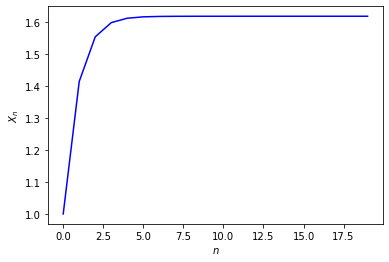

In [803]:
n = np.arange(len(xd))
plt.plot(n, xd, 'b')
plt.xlabel('$n$')
plt.ylabel('$X_n$')
plt.show()

In [805]:
print("Diperoleh nilai akar dari persamaan tersebut adalah", xd[len(xd)-1])

Diperoleh nilai akar dari persamaan tersebut adalah 1.6180339886113682


### **soal 2 menggunakan metode newton-raphson**

#### Persamaan awal:
- $f(x) = x - \mathrm{e}^{-2x^2}$

- $f'(x) = 1 + 4\mathrm{e}^{-2x^2}x$

In [806]:
def f(x):
    return x - math.pow(math.e, -2*x**2)

In [807]:
def f_turunan(x):
    return 1 + 4*math.pow(math.e, -2*x**2)*x


In [812]:
tol = 1.0E-10
delta = 1000
xn = 0.0
xd = []
lis_delta = []
while delta > tol:
    xd.append(xn)
    xnp1 = xn - f(xn) / f_turunan(xn)
    delta = abs(xnp1 - xn)
    lis_delta.append(delta)
    xn = xnp1
print(xd)

[0.0, 1.0, 0.43901794464507593, 0.5488956186350575, 0.5482170346052435, 0.548217081363998]


In [813]:
lis_delta

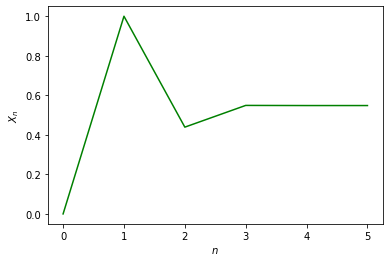

In [815]:
n = np.arange(len(xd))
plt.plot(n, xd, 'g')
plt.xlabel('$n$')
plt.ylabel('$X_n$')
plt.show()

### **soal 3 menggunakan metode sekan dan regula-falsi**

##### a) Metode Sekan

$f(x) = 1 - \frac{x^2}{2} + \frac{x^4}{24}$

In [816]:
def f(x):
    return 1 - x**2 / 2 + x**4 / 24

In [820]:
tol = 1.0E-10
delta = 1000
lis_delta = []
xn = 1
xnm1 = 2
fn = f(xn)
fnm1 = f(xnm1)

xd = []
while delta > tol:
    xd.append(xn)
    xnp1 = xn - fn*(xn - xnm1)/(fn - fnm1)
    delta = abs(xnp1 - xnm1)
    lis_delta.append(delta)
    fnp1 = f(xnp1)

    # simpan untuk iterasi berikutnya
    xnm1 = xn
    xn = xnp1
    fnm1 = fn
    fn = fnp1
print(xd)


[1, 1.619047619047619, 1.5924123508426622, 1.5924505900703534, 1.5924504340371173, 1.5924504340362513]


In [821]:
lis_delta

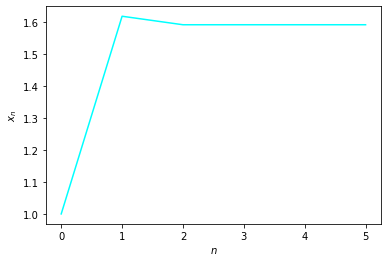

In [822]:
n = np.arange(len(xd))
plt.plot(n, xd, 'cyan')
plt.xlabel('$n$')
plt.ylabel('$x_n$')
plt.show()

##### b) Metode regula-falsi

$f(x) = 1 - \frac{x^2}{2} + \frac{x^4}{24}$

In [823]:
def f(x):
    return 1 - x**2 / 2 + x**4 / 24

In [824]:
a = 1.5890
b = 1.6190
fb = f(b)
fa = f(a)

c = b - fb*(b-a)/(fb-fa)
c

In [827]:
tol = 1.0E-10
delta = 1000
lis_delta = []
a = 1
b = 2
fa = f(a)
fb = f(b)
xd = []
xn = b

while delta > tol:
    c = b - fb*(b-a)/(fb-fa)
    fc = f(c)

    # cek jika interval mengandung solusi
    if (fa*fc) < 0:
        b = c
        fb = fc
    else:
        a = c
        fa = fc

    xd.append(c)
    xnp1 = c
    delta = abs(xnp1 - xn)
    lis_delta.append(delta)

    # simpan untuk iterasi berikutnya
    xn = xnp1
print(xd)


[1.619047619047619, 1.5924123508426622, 1.5924505900703534, 1.5924504340371173, 1.5924504340362513]


In [828]:
lis_delta

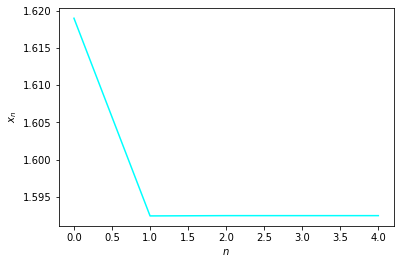

In [829]:
n = np.arange(len(xd))
plt.plot(n, xd, 'cyan')
plt.xlabel('$n$')
plt.ylabel('$x_n$')
plt.show()
